In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random

In [2]:
wd = os.getcwd()

In [3]:
train_dir = os.path.join(os.path.join(wd,'dataset'),'training_set')
test_dir = os.path.join(os.path.join(wd,'dataset'),'test_set')

In [4]:
labels = os.listdir(train_dir)
IMG_SIZE = 100

In [5]:
def create_dataset(directory,labels,IMG_SIZE):
    dataset = []
    for label in labels:
        path = os.path.join(directory,label)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            dataset.append([new_array,labels.index(label)])
    
    random.shuffle(dataset)
    X_set,y_set = [],[]
    for i in range(len(dataset)):
        X_set.append(dataset[i][0])
        y_set.append(dataset[i][1])
    X_set = np.array(X_set)
    y_set = np.array(y_set)
    
    return X_set,y_set

In [6]:
X_train,y_train = create_dataset(train_dir,labels,IMG_SIZE)
X_test,y_test = create_dataset(test_dir,labels,IMG_SIZE)

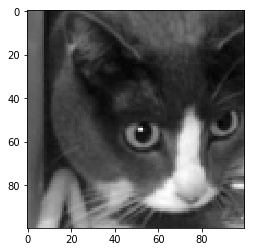

In [7]:
plt.imshow(X_train[5], cmap='gray')  # graph it
plt.show()  # display!

In [8]:
def normalize(X):
    X = X/255
    return X

def flatten(X):
    X = X.reshape(X.shape[0],-1)
    return X

X_train_flat = flatten(normalize(X_train))
X_test_flat = flatten(normalize(X_test))

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
clf = LogisticRegression()

In [11]:
clf.fit(X_train_flat,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
y_pred = clf.predict(X_test_flat)

In [14]:
from sklearn.metrics import classification_report,accuracy_score

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55      1000
           1       0.53      0.49      0.51      1000

   micro avg       0.53      0.53      0.53      2000
   macro avg       0.53      0.53      0.53      2000
weighted avg       0.53      0.53      0.53      2000



In [16]:
print(accuracy_score(y_test,y_pred))

0.5295


In [51]:
img_array = cv2.imread("dog.jpg" ,0)  # convert to array
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

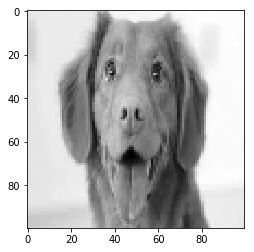

In [52]:
plt.imshow(new_array,cmap='gray')  # graph it
plt.show()  # display!

In [53]:
new_array = new_array/255
img = new_array.reshape(-1,100*100)
result = clf.predict(img)
if result==1:
    print("Lulu looks like a dog")
else:
    print("Lulu looks like a cat")

Lulu looks like a cat


(1, 10000)

Lulu looks like a dog


In [65]:
labels

['cats', 'dogs']

In [26]:
from joblib import dump,load

In [27]:
dump(clf,'logit.joblib')

['logit.joblib']

In [72]:
model = load('logit.joblib')

In [74]:
result = model.predict(X_test_flat)

In [75]:
accuracy_score(result,y_test)

0.5225